In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from CHproject import CH, C_max, C_min, CH_fbm

This project uses Sunspot data from the World Data Center SILSO, Royal Observatory of Belgium, Brussels.  For more information on the used data: consult their webpage http://www.sidc.be/silso/datafiles#total

In [2]:
# Lay-out of figures
plt.rc('font',   size=15)          # controls default text sizes
plt.rc('axes',   titlesize=15)     # fontsize of the axes title
plt.rc('axes',   labelsize=15)     # fontsize of the x and y labels
plt.rc('xtick',  labelsize=15)     # fontsize of the tick labels
plt.rc('ytick',  labelsize=15)     # fontsize of the tick labels
plt.rc('legend', fontsize=15)      # legend fontsize
plt.rc('figure', titlesize=15)     # fontsize of the figure title

In [4]:
# Choose the embedding dimension 
# and calculate the extremal complexity curves and fbm curve
n= 5 # The embedding dimension
cmax = C_max(n)
cmin = C_min(n)
fbm = CH_fbm(n) # this can take a minute

Load in Yearly data

In [6]:
# yearly average
data_y = np.genfromtxt("SN_y_tot_V2.0.txt")
year = data_y[:,0]
nspots_y = data_y[:,1]

# Calculate CH value
ch_year = CH(nspots_y, n)

Load in Monthly data

In [7]:
data_m = np.genfromtxt("SN_m_tot_V2.0.txt", usecols = [0,1,2,3])

month = data_m[:,2]
nspots_m = data_m[:,3]


# calculate CH value
ch_month = CH(nspots_m, n)

Load in Daily data

In [8]:
data_d = np.genfromtxt("SN_d_tot_V2.0.txt", usecols = [0,1,2,3,4])

day = data_d[:,3]
nspots_d = data_d[:,4]

# calculate CH value
ch_day = CH(nspots_d, n )

Plot the three time series

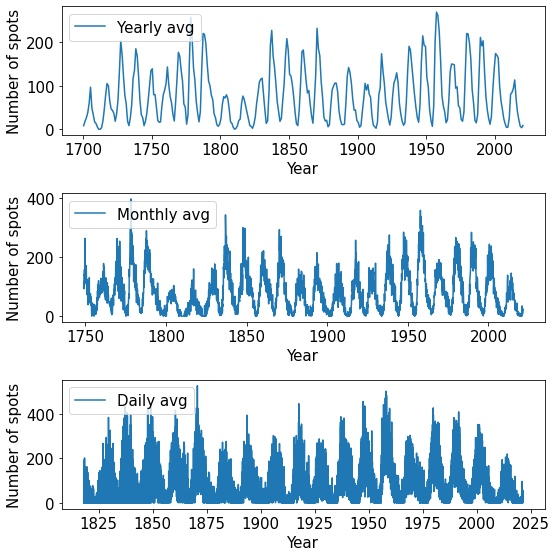

In [10]:
fig, ax = plt.subplots(3, figsize = (8,8))
ax[0].plot(year, nspots_y, label = "Yearly avg")
ax[1].plot(month, nspots_m, label = "Monthly avg")
ax[2].plot(day, nspots_d, label = "Daily avg")

for i in range(3):
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Number of spots")
    ax[i].legend(loc = 'upper left')
    
plt.tight_layout()

Plot the CH plane

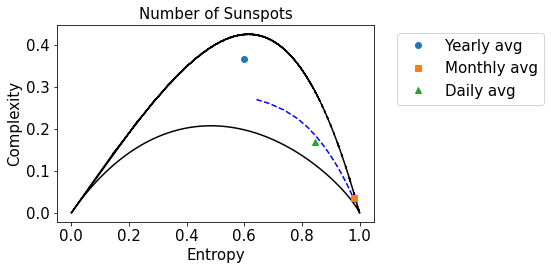

In [11]:
fig, ax = plt.subplots(figsize = (8, 4))
plt.plot(fbm[:,1], fbm[:,0], '--', color='blue', label = "fBm")
plt.plot(cmax[1], cmax[0] ,'k')
plt.plot(cmin[1], cmin[0],'k')

p1, = plt.plot(ch_year[1], ch_year[0], "o",label= "Yearly avg")
p2, = plt.plot(ch_month[1], ch_month[0], "s", label = "Monthly avg")
p3, = plt.plot(ch_day[1], ch_day[0], "^", label = "Daily avg")

plt.xlabel("Entropy")
plt.ylabel("Complexity")
plt.legend(handles=[p1,p2,p3], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Number of Sunspots")

plt.tight_layout()
plt.show()